In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Path to your dataset folder
DATA_DIR = Path("Datasets")

# Load smallest dataset
X = np.load(DATA_DIR / "kryptonite-10-X.npy")
y = np.load(DATA_DIR / "kryptonite-10-y.npy")

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 labels:", y[:5])

# Wrap in a DataFrame for easier exploration
df = pd.DataFrame(X, columns=[f"x{i+1}" for i in range(X.shape[1])])
df["label"] = y

df.head()


Shape of X: (20000, 10)
Shape of y: (20000,)
First 5 labels: [0 1 0 0 1]


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,label
0,1.187888,1.214287,0.908479,0.215856,0.203282,1.022097,-0.075807,-0.002180,0.127300,-0.007851,0
1,-0.141532,-0.154812,0.994477,0.980741,1.058951,-0.087281,0.952201,0.946226,-0.020900,0.995703,1
2,1.005807,-0.114741,0.951154,0.117097,-0.045550,1.044222,0.003008,0.087523,1.167185,-0.027434,0
3,1.113041,0.869040,1.001452,0.833202,0.927219,-0.151415,0.171125,0.799642,-0.191939,0.145807,0
4,1.109334,0.250857,0.016202,0.821271,1.170598,-0.083242,1.087080,-0.120940,-0.063181,-0.058706,1


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,20000.0,0.501697,0.509557,-0.396070,0.000534,0.733884,0.999196,1.369941
x2,20000.0,0.500986,0.510437,-0.381468,-0.000751,0.716317,0.999488,1.389974
x3,20000.0,0.503877,0.508071,-0.373754,0.002890,0.749316,1.000310,1.400530
x4,20000.0,0.500940,0.509863,-0.379018,-0.001376,0.735484,0.998135,1.403761
x5,20000.0,0.497846,0.510439,-0.389941,0.000100,0.244235,1.003092,1.363816
x6,20000.0,0.496430,0.510358,-0.386643,-0.000295,0.234195,1.000067,1.376934
x7,20000.0,0.499473,0.510002,-0.364814,-0.000753,0.328776,0.999320,1.390809
x8,20000.0,0.502886,0.510400,-0.435941,0.001179,0.745763,1.001021,1.476913
x9,20000.0,0.491874,0.510254,-0.356565,-0.003016,0.207636,0.999554,1.369774
x10,20000.0,0.500156,0.509345,-0.375314,0.002367,0.273529,1.001258,1.355936


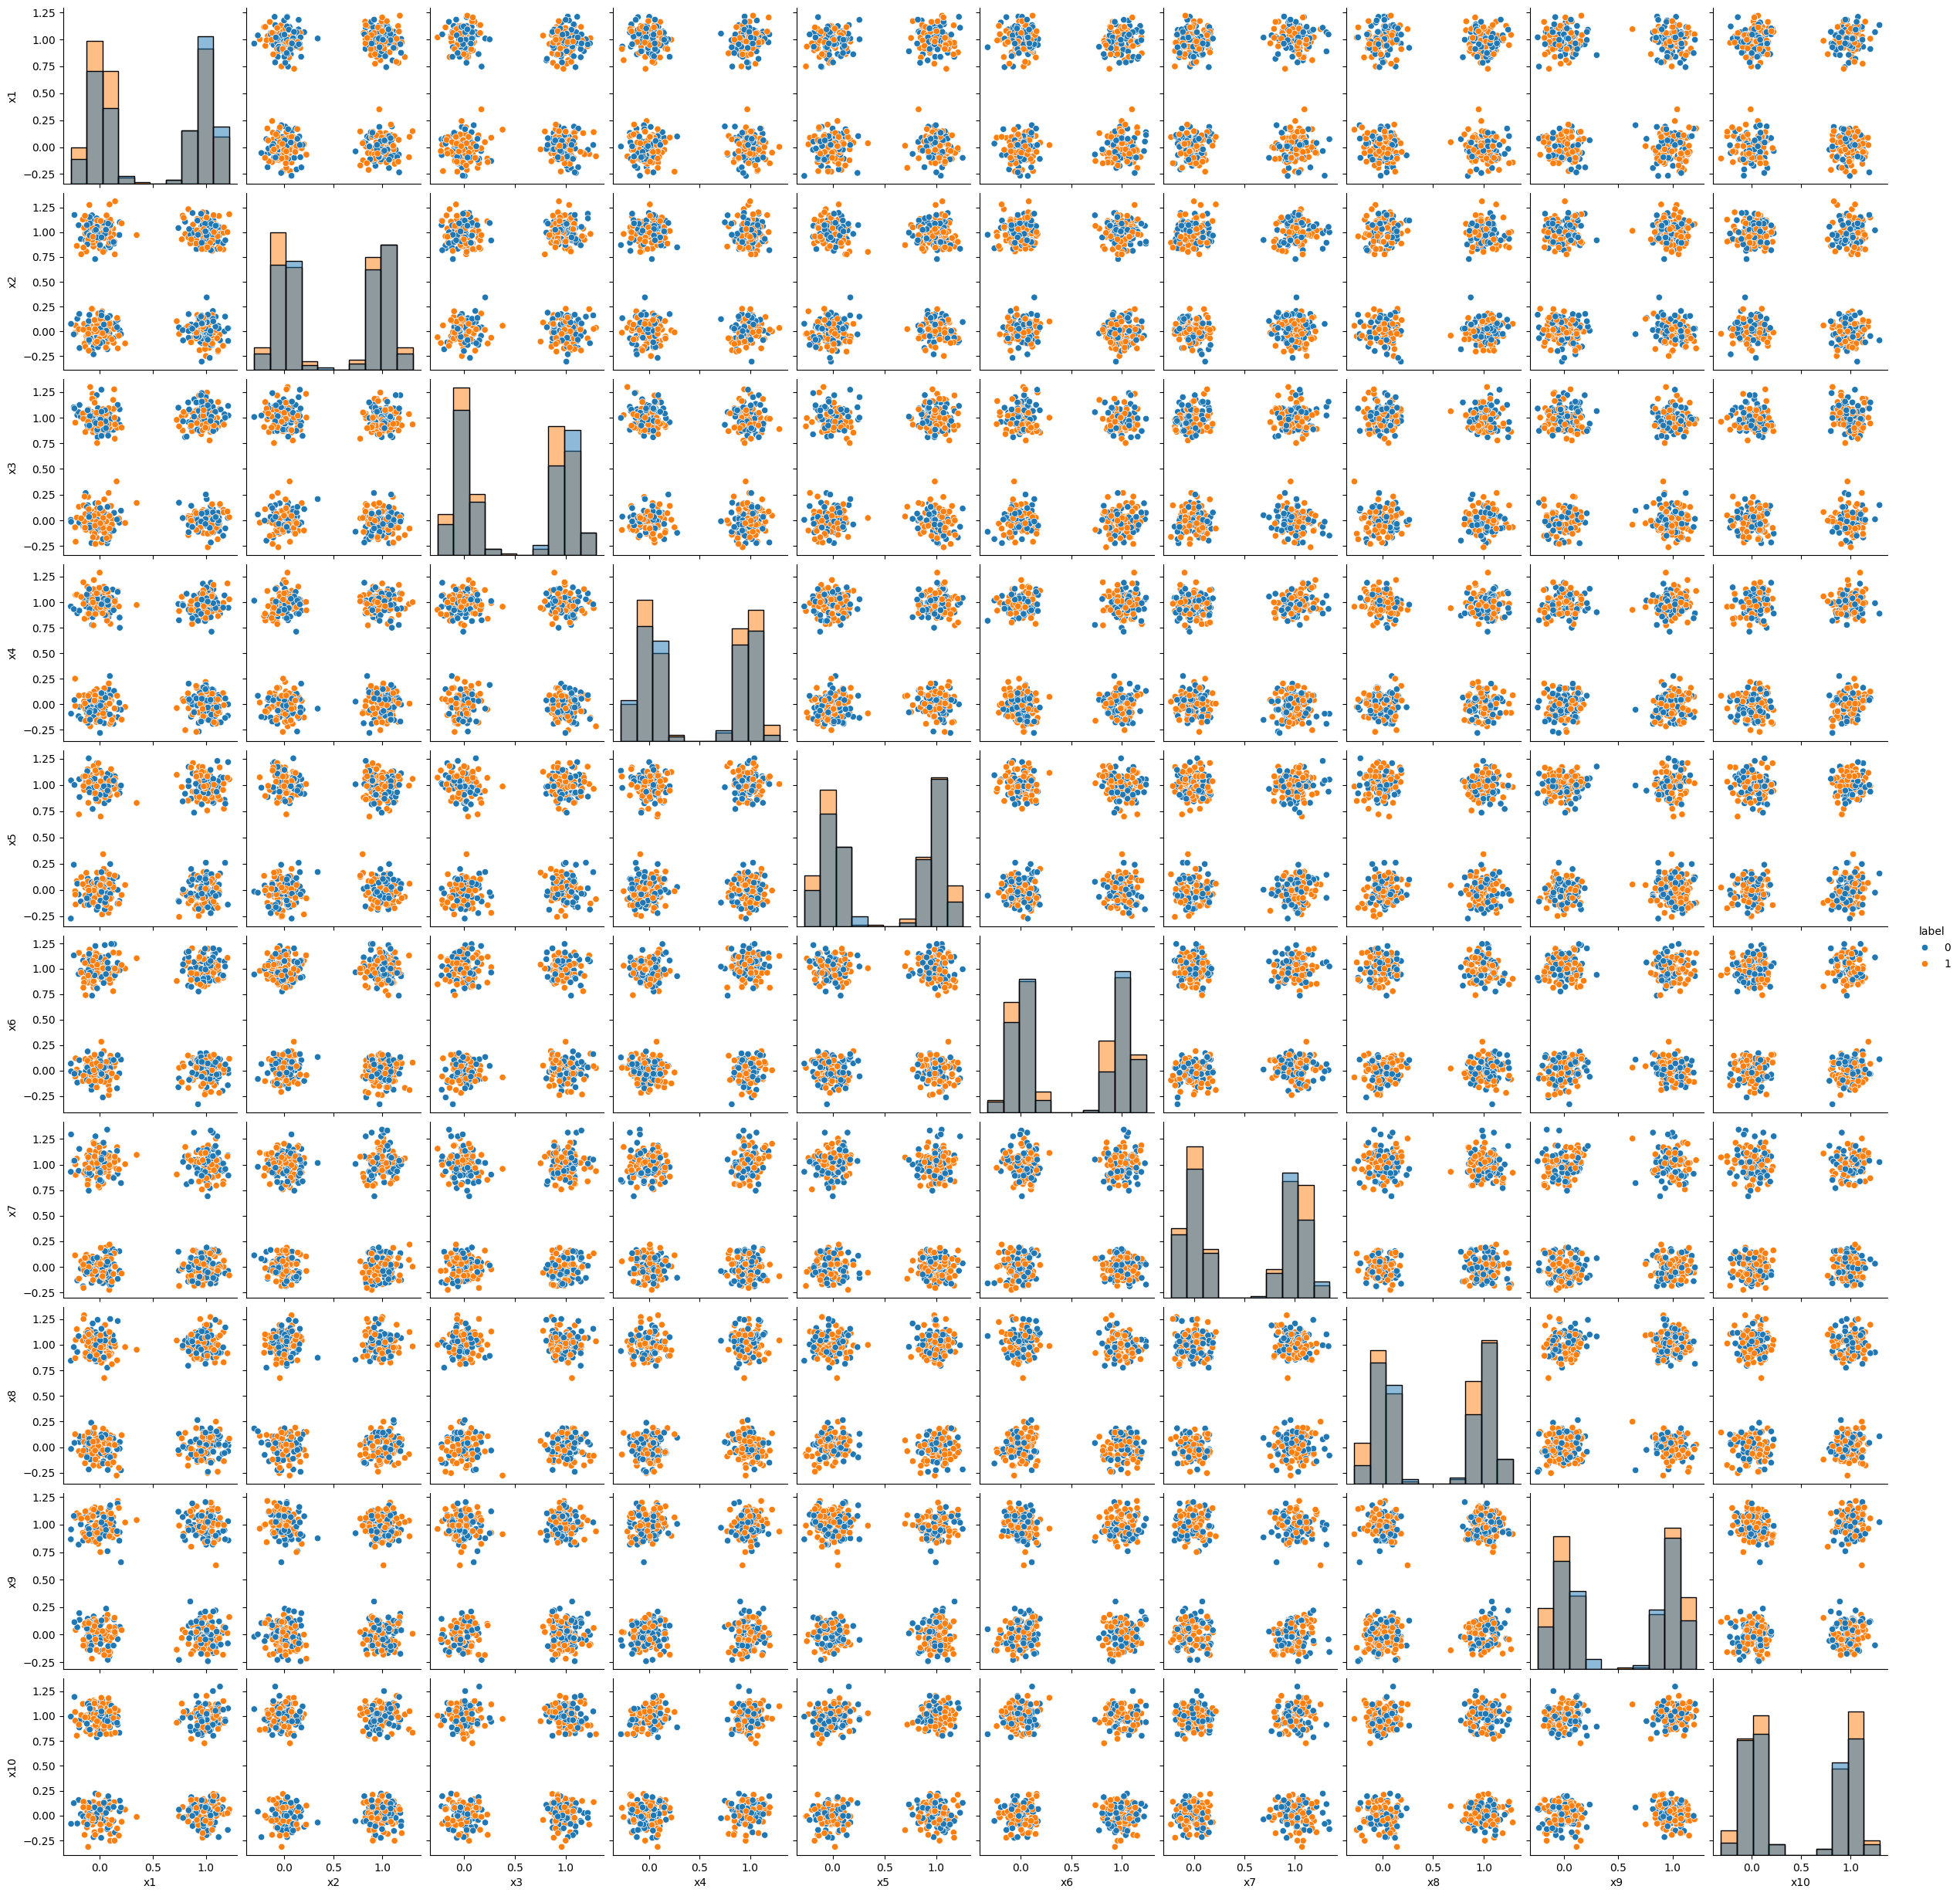

In [3]:
sns.pairplot(df.sample(500), hue="label", diag_kind="hist")
plt.show()


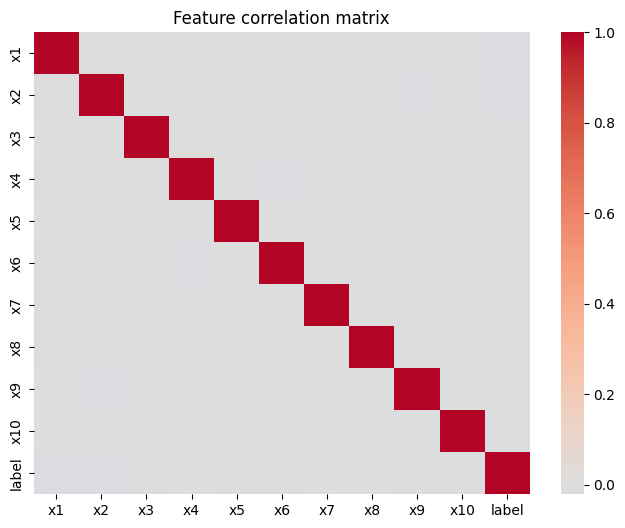

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature correlation matrix")
plt.show()


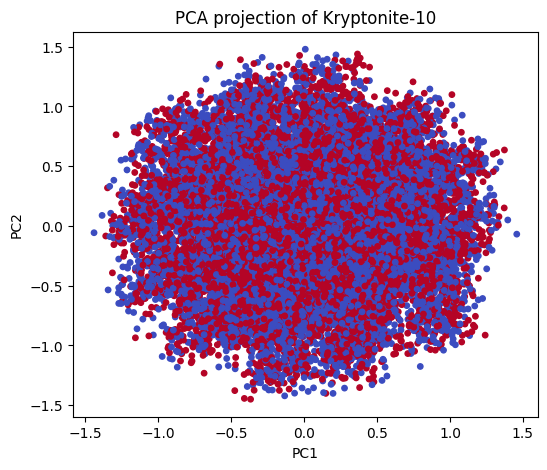

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(proj[:, 0], proj[:, 1], c=y, cmap="coolwarm", s=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection of Kryptonite-10")
plt.show()


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter=500)
scores = cross_val_score(clf, X, y, cv=5)
print("Mean accuracy:", scores.mean())


Mean accuracy: 0.51075


In [7]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf")
scores = cross_val_score(svm, X, y, cv=5)
print("RBF SVM accuracy:", scores.mean())


RBF SVM accuracy: 0.57255


## Run Code that are hyperparameter tuned on other file

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Create pipeline with scaling + SVM
svm = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", C=4, gamma=0.25, random_state=42)
)

# 5-fold cross-validation
scores = cross_val_score(svm, X, y, cv=5)
print(f"RBF SVM accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


RBF SVM accuracy: 0.9590 ± 0.0021


In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# MLP with optimal parameters
mlp = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        hidden_layer_sizes=(256, 256),
        activation="relu",
        alpha=3e-5,
        learning_rate_init=7e-4,
        batch_size=128,
        max_iter=1000,
        early_stopping=True,
        n_iter_no_change=15,
        random_state=42
    )
)

# 5-fold cross-validation
scores = cross_val_score(mlp, X, y, cv=5)
print(f"MLP accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


MLP accuracy: 0.9611 ± 0.0028
